In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
!pip install tensorflow --upgrade

In [4]:
%tensorflow_version 2.x

In [5]:
import tensorflow_datasets as tfds
import tensorflow_hub as hub

***Downloading Movie Review Dataset***

In [6]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [7]:
'''(train_data, validation_data), test_data = tfds.load(name='imdb_reviews',
                          split = (tfds.Split.TRAIN.subsplit([6,4]), tfds.Split.TEST),
                          as_supervised=True)'''

"(train_data, validation_data), test_data = tfds.load(name='imdb_reviews',\n                          split = (tfds.Split.TRAIN.subsplit([6,4]), tfds.Split.TEST),\n                          as_supervised=True)"

In [8]:
(train_data, validation_data, test_data), metadata = tfds.load('imdb_reviews',
                                                     split=["train[:80%]","train[80%:90%]","train[90%:]"],
                                                     data_dir="./dataset",
                                                     as_supervised=True,
                                                     with_info=True)

In [9]:
type(train_data)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [10]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [11]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [12]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

***Using Word to Vec***

***Converting Word2Vec by Transfer Learning***

In [13]:
pretrained_model = 'https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1'

***Making layer which convert text into embeddding vector***

In [14]:
hub_layer = hub.KerasLayer(pretrained_model, input_shape = [], dtype=tf.string, trainable=True)

In [15]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [16]:
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ]],
      dtype=float32)>

***Creating Actual Neural Network***

In [17]:
model=tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(train_data.shuffle(10000).batch(512),
          epochs=20,
          validation_data=validation_data.batch(512),
          verbose=1)

Epoch 1/20
40/40 [==============================] - 4s 75ms/step - loss: 0.7527 - accuracy: 0.5727 - val_loss: 0.6534 - val_accuracy: 0.6264
Epoch 2/20
40/40 [==============================] - 4s 73ms/step - loss: 0.6166 - accuracy: 0.6663 - val_loss: 0.5867 - val_accuracy: 0.6880
Epoch 3/20
40/40 [==============================] - 3s 66ms/step - loss: 0.5695 - accuracy: 0.7060 - val_loss: 0.5517 - val_accuracy: 0.7184
Epoch 4/20
40/40 [==============================] - 3s 66ms/step - loss: 0.5332 - accuracy: 0.7355 - val_loss: 0.5191 - val_accuracy: 0.7436
Epoch 5/20
40/40 [==============================] - 3s 65ms/step - loss: 0.4983 - accuracy: 0.7625 - val_loss: 0.4864 - val_accuracy: 0.7668
Epoch 6/20
40/40 [==============================] - 3s 69ms/step - loss: 0.4610 - accuracy: 0.7893 - val_loss: 0.4539 - val_accuracy: 0.7972
Epoch 7/20
40/40 [==============================] - 3s 69ms/step - loss: 0.4242 - accuracy: 0.8109 - val_loss: 0.4221 - val_accuracy: 0.8128
Epoch 8/20
40

In [20]:
model.predict(["This is the great movie I have seen"])

array([[0.9816724]], dtype=float32)

In [21]:
results = model.evaluate(test_data.batch(512), verbose=2)


5/5 - 0s - loss: 0.2771 - accuracy: 0.8852


***Test for 512 test data***

In [22]:
x_test, y_test = next(iter(test_data.batch(512)))

In [23]:
x_test.shape

TensorShape([512])

In [24]:
y_test.shape

TensorShape([512])

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred=y_pred.flatten()

In [27]:
y_pred.shape

(512,)

In [28]:
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i]) # set a new value

***Confusion Matrix,Accuracy and Precision*** 

In [29]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.90234375


In [31]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,  average='macro'))

Precision: 0.9015781747002691
Recall: 0.9026866220940931


In [32]:
 cf_matrix = confusion_matrix(y_test, y_pred)
 print(cf_matrix)

[[246  28]
 [ 22 216]]


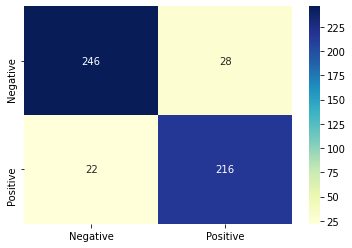

In [33]:
import seaborn as sns
sns.heatmap(cf_matrix, cmap='YlGnBu', annot=True, fmt = 'd', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])

***Detection and segmentation of sentiment ( Positive , negative or neutral )***

In [34]:
def check(text):
  val=model.predict([text])
  if(val <=0.4):
    print("value : ",val,"Sentiment : Negative")
  elif(val>0.4 and val<=0.7):
    print("value : ",val,"Sentiment : Neural")
  else:
    print("value : ",val,"Sentiment : Positive")


In [35]:
text=input("Enter review : ")
check(text)

Enter review : Childhood is unforgettable
value :  [[0.9525337]] Sentiment : Positive


In [41]:
text=input("Enter review : ")
check(text)

Enter review : Childhood will be terrible without game
value :  [[0.23059756]] Sentiment : Negative


In [37]:
text=input("Enter review : ")
check(text)

Enter review : Childhood is the time to play
value :  [[0.5721104]] Sentiment : Neural


***Example reviews***

In [38]:
text=input("Enter review : ")
check(text)

Enter review : Great
value :  [[0.9768364]] Sentiment : Positive


In [39]:
text=input("Enter review : ")
check(text)

Enter review : Horrible
value :  [[0.44246292]] Sentiment : Neural


In [40]:
text=input("Enter review : ")
check(text)

Enter review : Fine
value :  [[0.5543581]] Sentiment : Neural


#Thank You
***Amrita Gautam***